# **Pràctica 6: exercici examen anterior**

<hr>

**[1] Nom: Izan Garrido Dorado

**[1] NIU: 1704520

**[1] mail (gmail):izanraptor@gmail.com

<hr>

**[2] Nom: Pablo López Fiol

**[2] NIU: 1706501

**[2] mail (gmail): pablolopezfiol10@gmail.com

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr6_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr6_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr6_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr6_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

###**Ejercicio**

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido (líquido o gas), como resultado de choques contra las moléculas de dicho fluido.

El movimiento browniano se encuentra entre los procesos estocásticos más simples. Vamos a considerar la siguiente ecuación principal que genera los puntos que siguen un movimiento browniano:

$\omega \left(\frac{i}{n}\right)=\omega\left(\frac{i-1}{n}\right) + \frac{Y_i}{\sqrt{n}}$

donde $\omega$ es la posición de la partícula (x, y o z) en el paso $i$ de los $n$ que se haya desplazado desde el inicio. $Y_i$ es un proceso estocástico cualquiera, y en este caso vamos a considerar que sigue una distribución gaussiana estándar ($\mu=0$,$\sigma=1$).

### <font color='green'>**> Entrega #1**</font>
Define una funcion de este movimiento browniano, que devuelva una lista con N puntos de un movimiento 1-D. Dibuja en una gráfica 4 sets de movimiento browniano de 1000 pasos usando esta función: es decir las posiciones vs. número de pasos dados para 4 movimientos diferentes. **[3 punts]**

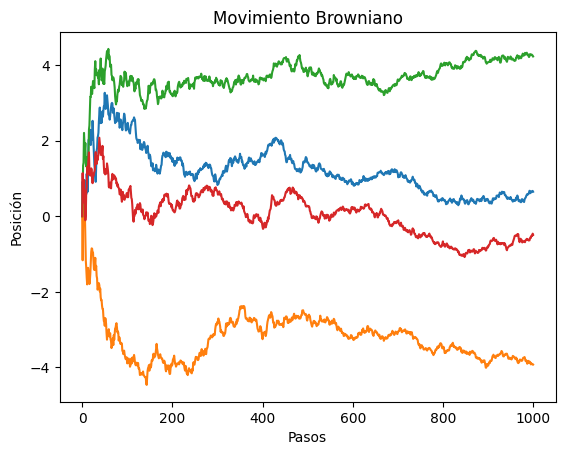

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def w(N):
    Y_i = np.random.normal(0,1, N)
    w_0=0
    w=[]
    pasos=np.linspace(0,N,N)
    w.append(w_0)
    for x in Y_i:
      w_0=w_0+x/np.sqrt(len(w))
      w.append(w_0)
    return(w)

for a in range(4):
  plt.plot(w(1000))

plt.title("Movimiento Browniano")
plt.xlabel("Pasos")
plt.ylabel("Posición")
plt.show()



### <font color='green'>**> Entrega #2**</font>

Genera un movimiento browniano en 2-D utilizando la función de movimiento previamente definida en el apartado anterior. Genera 1000 pares de puntos en 2-D para $x$ e $y$.

Representa gráficamente el movimiento, comprobando que siga un recorrido aleatorio. Además dibuja un círculo de radio 1. Este movimiento sale del círculo? Si repites la experiencia eres capaz de tener un movimiento totalmente contenido en el círculo? **[4 punts]**


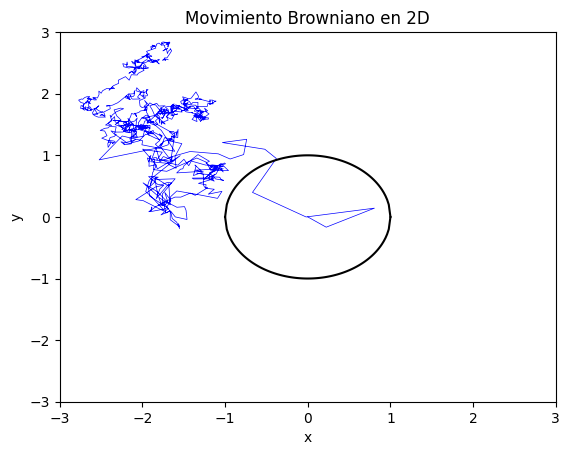

In [5]:
x=w(1000)
y=w(1000)
def f(x_c):
  return(np.sqrt(-x_c**2+1))

plt.plot(x,y, color="b", lw=0.5)
plt.title("Movimiento Browniano en 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(np.linspace(-1,1,100),f(np.linspace(-1,1,100)), color="k")
plt.plot(np.linspace(-1,1,100),-f(np.linspace(-1,1,100)), color="k")

plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()






### <font color='green'>**> Entrega #3**</font>

Calcula cuál es la probabilidad de tener un movimiento browniano de 1000 pasos totalmente auto-contenido en un círculo de radio 1, con una precisión del 10%.

Vamos a simular muchos casos para estimar esta probabilidad $\hat{p}$ y el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de experiencias hasta que este error sea menor del $10\%$ (recuerda que en la simulación tienes infinitas realizaciones a tu disposición...). **NOTA:** Que un movimiento salga o no del círculo sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{autocontenido}}{N_{total}}
\\
$$

$$
var[\hat{p}] = \frac{\hat{p}(1-\hat{p})}{N_{total}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$


Para las simulaciones que necesites para alcanzar esta precisión, realiza tres gráficas:

1.   Un histograma de distancias máximas al centro, desde donde parte la partícula, para cada una de las simulaciones.
2.   La evolución de la probabilidad (P en %) con el número de simulaciones.
3.   La evolución del error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de simulaciones.

Muestra por pantalla cuántas simulaciones necesitas para poder hacer esta estimación de $\hat{p}$ con un error menor del $10\%$, y cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$. **[3 punts]**


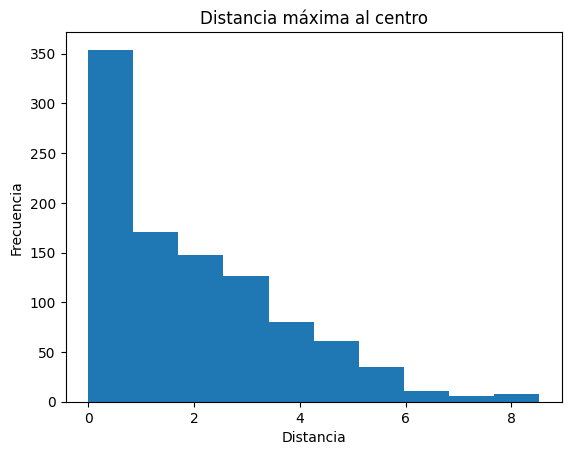

0.666063936063936


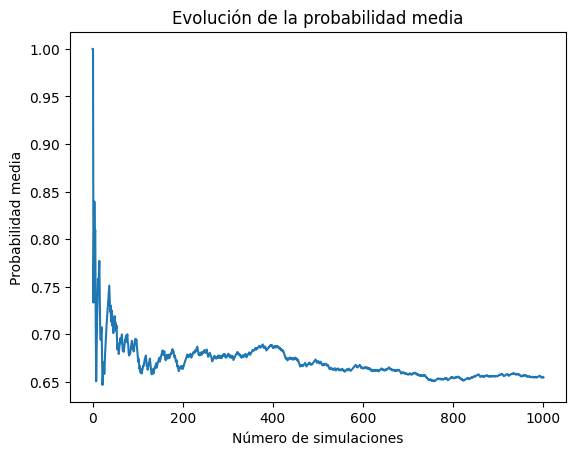

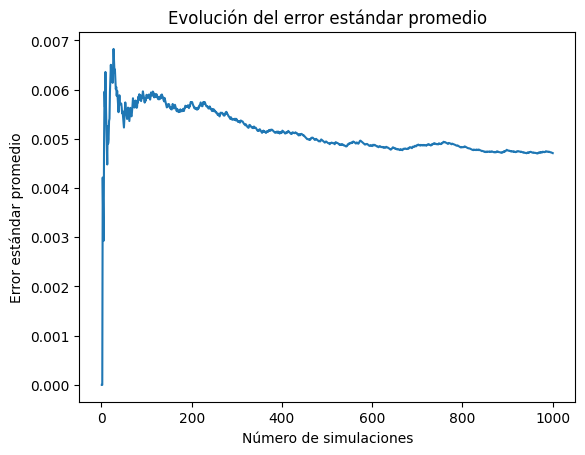

In [41]:
probs=[]

w_max=[]

def p(N):                        #Esta función me devuelve los Nautocontenido
    Y_i = np.random.normal(0,1, N)
    w_0=0
    w=[]

    w.append(w_0)
    for x in Y_i:
      w_0=w_0+x/np.sqrt(len(w))
      w.append(w_0)
    N_in=[]
    for i in w:
      if i < np.abs(1):
        N_in.append(i)
    w_max.append(max(w))
    return(len(N_in)/len(w))


for i in range(1000):
  probs.append(p(1000))

plt.hist(w_max)
plt.title("Distancia máxima al centro")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()

media=sum(probs)/len(probs)
print(media)

vars=[]

for prob in probs:
  vars.append(prob*(1-prob)/1000)
p_sims=[]
medias=[]

for i in range(1000):
 p_sims.append(p(1000))
 media=sum(p_sims)/len(p_sims)
 medias.append(media)
plt.plot(np.linspace(0,1000,1000), medias)
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad media')
plt.title('Evolución de la probabilidad media')
plt.show()

errores_sims=[]
errores_medias=[]

for i in range(len(p_sims)):
    p_i = p_sims[i]
    error_i = np.sqrt(p_i * (1 - p_i) / 1000)
    errores_sims.append(error_i)
    media_error = np.mean(errores_sims)
    errores_medias.append(media_error)

plt.plot(np.linspace(1, len(p_sims), len(p_sims)), errores_medias)
plt.xlabel('Número de simulaciones')
plt.ylabel('Error estándar promedio')
plt.title('Evolución del error estándar promedio')
plt.show()





<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr6_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr6_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr6_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr6_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>